In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading the prediction csv file
df_pred=pd.read_csv('prediction_data.csv')

In [4]:
#checking on the first 5 rows
df_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


<b> Top tweeted/posted Breeds </B>

In [5]:
#Taking the value count into Dataframe
top_breeds=pd.DataFrame(df_pred['p1'].value_counts())
top_breeds.reset_index(inplace=True)
top_breeds.rename(columns={'index':'breeds'},inplace=True)
top_breeds.head()

,breeds,p1
0,golden_retriever,126
1,pembroke,78
2,labrador_retriever,77
3,chihuahua,54
4,pug,41


Text(0.5,1,'Top 5 popular/tweeted breeds')

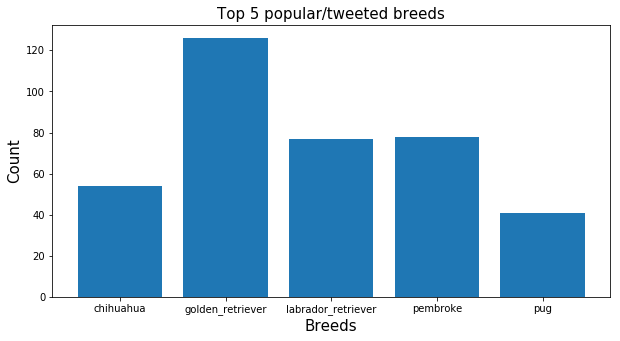

In [6]:
#plotting the value count of the most popular/tweeted breeds
plt.figure(figsize=(10,5))
plt.bar(top_breeds.breeds[:5],top_breeds.p1[:5])
plt.xlabel('Breeds',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Top 5 popular/tweeted breeds',fontsize=15)

<b>Inference: The golden retreiver as expected, pug, labrador retriever are among the most tweeted breeds in the account</b>

<b> Checking out the avg accuracy of algorithm </b>

In [7]:
acc_1=df_pred['p1_conf'].mean()
acc_2=df_pred['p2_conf'].mean()
acc_3=df_pred['p3_conf'].mean()
d={'Algorithms':['Algo-1','Algo-2','Algo-3'],'Accuracy':[acc_1,acc_2,acc_3]}

In [8]:
df_acc=pd.DataFrame(d)
df_acc

,Algorithms,Accuracy
0,Algo-1,0.627221
1,Algo-2,0.143309
2,Algo-3,0.061627


Text(0.5,1,'Algorithm Confidency Interval')

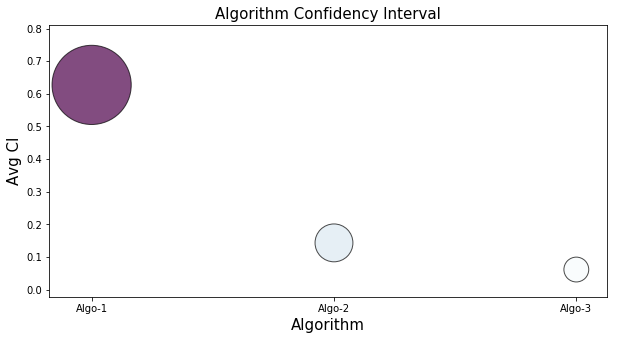

In [9]:
plt.figure(figsize=(10,5))
plt.scatter(df_acc['Algorithms'],df_acc['Accuracy'],s=df_acc['Accuracy']*10000,alpha=0.7,  c=df_acc['Accuracy'],cmap="BuPu",edgecolors='black')
plt.xlabel('Algorithm',fontsize=15)
plt.ylabel('Avg CI',fontsize=15)
plt.title('Algorithm Confidency Interval',fontsize=15)

<b> As it can be inferred from the above insight that algorithm-1 has highest average accuracy </b>

In [10]:
#Reading the prediction csv file
df_twitter=pd.read_csv('Twitter_data.csv')

In [11]:
# Checking out the first 5 rows
df_twitter.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,DogStage,favorite_count,retweet_count
0,8.902403e+17,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,14.0,10.0,Cassie,doggo,NaN,NaN
1,8.896654e+17,2017-07-25 01:55:32,Here's a puppo that seems to be on the fence a...,13.0,10.0,None,puppo,NaN,NaN
2,8.895311e+17,2017-07-24 17:02:04,This is Stuart. He's sporting his favorite fan...,13.0,10.0,Stuart,puppo,NaN,NaN
3,8.863661e+17,2017-07-15 23:25:31,This is Roscoe. Another pupper fallen victim t...,12.0,10.0,Roscoe,pupper,3316.0,21524.0
4,8.863661e+17,2017-07-15 23:25:31,This is Roscoe. Another pupper fallen victim t...,12.0,10.0,Roscoe,pupper,3316.0,21524.0


In [12]:
#Grouping the dogstage based on the ratings_numerator
df_rating=df_twitter.groupby(['DogStage'])['rating_numerator'].mean()
df_rating=pd.DataFrame(df_rating)
df_rating.reset_index(inplace=True)
df_rating.head()

,DogStage,rating_numerator
0,doggo,11.636364
1,doggopupper,11.900000
2,floofer,11.833333
3,pupper,10.674731
4,puppo,12.023810


In [13]:
#Grouping the dogstage based on the favorite_count
df_fav_count=df_twitter.groupby(['DogStage'])['favorite_count'].mean()
df_fav_count=pd.DataFrame(df_fav_count)
df_fav_count.reset_index(inplace=True)

<b> Visualizing the ratings with respect to DogTypes</b>

Text(0.5,1,'Avg Ratings for dog types')

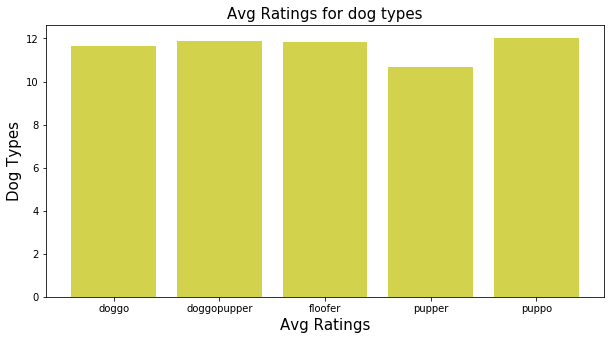

In [14]:
plt.figure(figsize=(10,5))
plt.bar(df_rating['DogStage'],df_rating['rating_numerator'],color='y',alpha=0.7)
plt.xlabel('Avg Ratings',fontsize=15)
plt.ylabel('Dog Types',fontsize=15)
plt.title('Avg Ratings for dog types',fontsize=15)

<b> Visualizing the Favourites with respect to DogTypes</b>

Text(0.5,1,'Avg Favourite count for dog types')

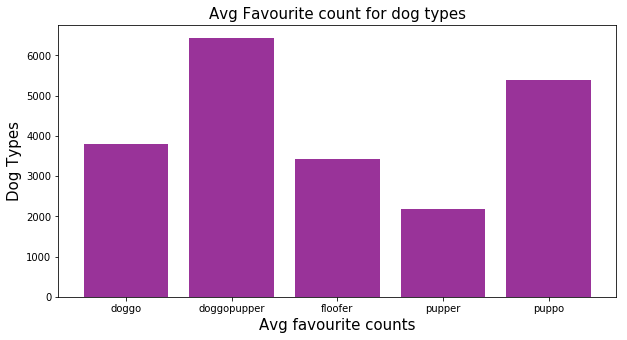

In [15]:
plt.figure(figsize=(10,5))
plt.bar(df_fav_count['DogStage'],df_fav_count['favorite_count'],color='purple',alpha=0.8)
plt.xlabel('Avg favourite counts',fontsize=15)
plt.ylabel('Dog Types',fontsize=15)
plt.title('Avg Favourite count for dog types',fontsize=15)

<b>Inference: From the above insight on ratings with respect to dogStages all the breeds were more or less closer to each other.<br>
But with respect to Favouries count, the puppo stage has been the most liked </b>

<b> Checking if the Favorites and Retweets go hand in hand with numrator ratings </b>

Text(0.5,1,'Rating vs Favorite count ')

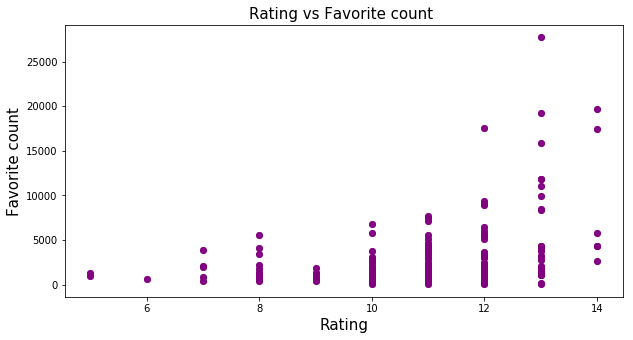

In [16]:
plt.figure(figsize=(10,5))
plt.scatter(df_twitter['rating_numerator'],df_twitter['favorite_count'],color='purple',alpha=0.8)
plt.xlabel('Rating',fontsize=15)
plt.ylabel('Favorite count',fontsize=15)
plt.title('Rating vs Favorite count ',fontsize=15)

Text(0.5,1,'Rating vs Retweet count ')

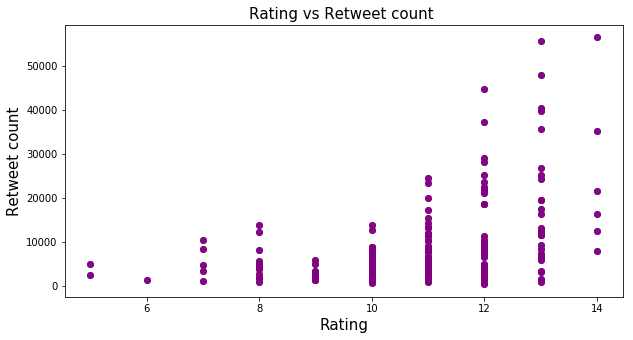

In [17]:
plt.figure(figsize=(10,5))
plt.scatter(df_twitter['rating_numerator'],df_twitter['retweet_count'],color='purple',alpha=0.8)
plt.xlabel('Rating',fontsize=15)
plt.ylabel('Retweet count',fontsize=15)
plt.title('Rating vs Retweet count ',fontsize=15)

<b> Inference: Both a retweet and favourite counts are relative to ratings </b>

<b> Combining the prediction data with twitter data </b>

In [18]:
df_total=df_twitter.merge(df_pred,on='tweet_id',how='left')

In [19]:
df_total.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,DogStage,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,8.902403e+17,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,14.0,10.0,Cassie,doggo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8.896654e+17,2017-07-25 01:55:32,Here's a puppo that seems to be on the fence a...,13.0,10.0,None,puppo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8.895311e+17,2017-07-24 17:02:04,This is Stuart. He's sporting his favorite fan...,13.0,10.0,Stuart,puppo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8.863661e+17,2017-07-15 23:25:31,This is Roscoe. Another pupper fallen victim t...,12.0,10.0,Roscoe,pupper,3316.0,21524.0,https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg,1.0,french_bulldog,0.999201,True,chihuahua,0.000361,True,boston_bull,0.000076,True
4,8.863661e+17,2017-07-15 23:25:31,This is Roscoe. Another pupper fallen victim t...,12.0,10.0,Roscoe,pupper,3316.0,21524.0,https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg,1.0,french_bulldog,0.999201,True,chihuahua,0.000361,True,boston_bull,0.000076,True


<b> Visualizing the highest liked breeds </b>

In [20]:
df_total.dropna(subset=['retweet_count','favorite_count','p1'],inplace=True)
df_breeds=df_total.groupby('p1')['favorite_count'].mean()
df_breeds=df_breeds.sort_values(ascending=False)
df_breeds=pd.DataFrame(df_breeds).reset_index()
df_breeds.head()

,p1,favorite_count
0,flat-coated_retriever,19196.0
1,cardigan,11007.0
2,rottweiler,10606.5
3,tibetan_mastiff,9907.0
4,chihuahua,8473.5


Text(0.5,1,'Top 5 liked breeds')

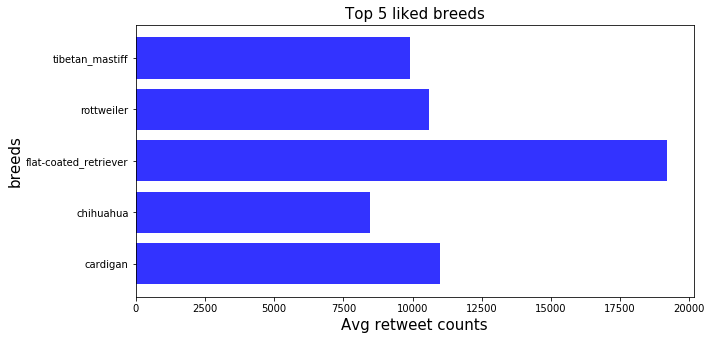

In [21]:
plt.figure(figsize=(10,5))
plt.barh(df_breeds['p1'].head(),df_breeds['favorite_count'].head(),color='blue',alpha=0.8)
plt.xlabel('Avg retweet counts',fontsize=15)
plt.ylabel('breeds',fontsize=15)
plt.title('Top 5 liked breeds',fontsize=15)

Text(0.5,1,'Least 5 liked breeds')

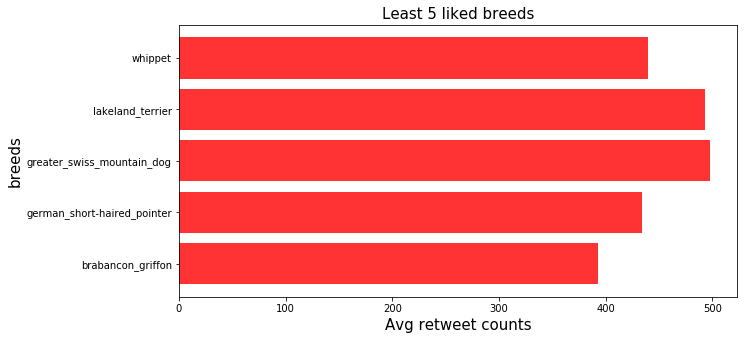

In [22]:
plt.figure(figsize=(10,5))
plt.barh(df_breeds['p1'].tail(),df_breeds['favorite_count'].tail(),color='red',alpha=0.8)
plt.xlabel('Avg retweet counts',fontsize=15)
plt.ylabel('breeds',fontsize=15)
plt.title('Least 5 liked breeds',fontsize=15)

<b> Rotweiller has been the most liked breed of them all in the WeRateDogs twitter account </b>

<b> Getting an insight on how the least and most liked breed for each dog stages </b>

In [23]:
df_dog_gr=df_total.groupby(['DogStage','p1']).mean()[['favorite_count','retweet_count']]
df_dog_gr

favorite_count  retweet_count
DogStage    p1                                                           
doggo       beagle                             3472.000000    8295.000000
            bedlington_terrier                 1263.000000    4238.000000
            briard                             6470.000000   18630.000000
            chesapeake_bay_retriever           4376.000000   12376.000000
            cocker_spaniel                     2090.000000   10192.000000
            dandie_dinmont                     2072.000000    8241.000000
            german_shepherd                    1846.000000    6642.000000
            golden_retriever                   6141.142857   16050.857143
            great_dane                         4207.000000   11694.000000
            great_pyrenees                     6920.000000   23378.000000
            labrador_retriever                 3999.000000   19775.000000
            norwegian_elkhound                 3652.000000   13242.000000
            siberian_husky                     2194.000000   10342.000000
doggopupper dalmatian                          2429.000000    8992.000000
            golden_retriever                   2846.500000    8481.000000
floofer     english_springer                   3433.000000   17169.000000
pupper      american_staffordshire_terrier     2435.000000    5407.000000
            bernese_mountain_dog               1620.000000    4489.000000
            blenheim_spaniel                   1876.000000    5897.000000
            bloodhound                         2393.500000   12257.500000
            border_collie                       723.000000    2881.000000
            boxer                               569.000000    2203.000000
            brabancon_griffon                   393.000000    1137.000000
            briard                             1264.000000    7117.000000
            chihuahua                          8473.500000   21437.500000
            chow                               1527.000000    4537.000000
            cocker_spaniel                     2671.000000   15193.500000
            dalmatian                          1505.000000    8485.000000
            english_springer                    579.000000    2232.000000
            french_bulldog                     2013.000000   12399.500000
...                                                    ...            ...
            miniature_pinscher                  473.000000    2044.000000
            miniature_poodle                   1972.000000    3955.000000
            norwegian_elkhound                 7126.000000   24553.000000
            norwich_terrier                     912.000000    3072.000000
            papillon                           1094.666667    3803.333333
            pekinese                           3285.000000    8092.000000
            pembroke                           4942.285714   11058.714286
            pomeranian                          645.000000    2082.333333
            pug                                 912.500000    2137.833333
            redbone                            3802.000000    8653.000000
            rottweiler                         1544.000000    4042.000000
            shetland_sheepdog                  3124.500000   12054.000000
            shih-tzu                           1239.000000    3116.000000
            siberian_husky                     2731.000000   17480.000000
            staffordshire_bullterrier           842.000000    3397.000000
            tibetan_mastiff                    9907.000000   25057.000000
            toy_poodle                         2233.000000    5999.000000
            vizsla                             1667.000000    7467.000000
            whippet                             440.000000    1280.000000
puppo       airedale                           1738.000000    7114.000000
            american_staffordshire_terrier     1369.000000    5927.000000
            cardigan                          11

<b> As it can be inferred that Beagle was the least liked breed suprisingly and great_pyrenees is the most liked among Doggo stage.<br>
Among puppo it is rottweiler which is the most liked and eskimo is the least liked dog. <br>
Among pupper it is labrador_retriever which is the most liked breed and vizsla is the least liked breed</b>


<b> Getting a statistical insight on the retweet and favourites count </b>

In [24]:
df_total.describe()

,tweet_id,rating_numerator,rating_denominator,favorite_count,retweet_count,img_num,p1_conf,p2_conf,p3_conf
count,2.380000e+02,238.000000,238.0,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,7.480821e+17,11.201681,10.0,3111.000000,10016.831933,1.344538,0.653157,0.143845,0.056021
std,6.705363e+16,1.372299,0.0,4141.144938,11172.659979,0.704859,0.235781,0.111160,0.048752
min,6.721600e+17,8.000000,10.0,103.000000,693.000000,1.000000,0.100499,0.000068,0.000034
25%,6.834674e+17,10.000000,10.0,998.500000,2891.750000,1.000000,0.457129,0.049728,0.017047
50%,7.410673e+17,11.000000,10.0,1704.000000,5999.000000,1.000000,0.698165,0.120530,0.036320
75%,8.126694e+17,12.000000,10.0,3462.250000,11650.250000,1.000000,0.843346,0.217866,0.091880
max,8.863661e+17,14.000000,10.0,27728.000000,56413.000000,4.000000,0.999828,0.467678,0.181985


<b> Inference: The retweet count and favourites count has a mean of 4511 and 16397 with the favourite count having a larger spread.
    the Alogorithm-1 has the highest confidence interval with a larger spread tham the other two </b>